# Using a Public API with Python

In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2ed93a36-dc84-491f-a4f7-98a35ef621d6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-14T05:04:30.958Z', 'error_code': 0, 'error_message': None, 'elapsed': 55, 'credit_count': 1, 'notice': None, 'total_count': 10194}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10341, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [ ]:
#Resources when stuck.
#https://www.youtube.com/watch?v=2HfSFdPEFRg
#https://github.com/AlexTheAnalyst/AlexTheAnalyst/blob/master/How%20to%20use%20an%20API%20%2B%20API%20Test%20Notebook%20.ipynb

In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [13]:
#This normalizes the data and makes it pretty in a dataframe.
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\ohid1\AppData\Local\Temp\ipykernel_5588\1264467785.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10341,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942876e+07,1.942876e+07,False,NaN,1,NaN,NaN,None,2023-07-14T05:03:00.000Z,31399.800647,2.555089e+10,72.8032,-0.193283,3.686467,4.344049,20.868398,15.006769,3.331480,6.100593e+11,48.5116,6.593958e+11,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:04:34.279733
1,1027,Ethereum,ETH,ethereum,7113,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202047e+08,1.202047e+08,True,NaN,2,NaN,NaN,None,2023-07-14T05:03:00.000Z,2009.427877,1.249291e+10,99.0373,-0.021668,7.752824,8.355250,15.325686,9.988993,-3.813999,2.415427e+11,19.2074,2.415427e+11,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:04:34.279733
2,825,Tether,USDT,tether,56816,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.343409e+10,8.673098e+10,True,NaN,3,NaN,NaN,None,2023-07-14T05:03:00.000Z,1.000449,4.726731e+10,130.7689,0.016739,0.039689,0.029788,0.068533,0.017181,-0.026966,8.347152e+10,6.6384,8.676989e+10,None,2023-07-14T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-14 05:04:34.279733
3,52,XRP,XRP,xrp,989,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-14T05:03:00.000Z,0.788792,1.256388e+10,1660.3312,0.838814,67.008489,68.139603,52.971991,83.789883,51.565614,4.144634e+10,3.2958,7.887917e+10,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:04:34.279733
4,1839,BNB,BNB,bnb,1501,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558491e+08,1.558491e+08,False,NaN,5,NaN,NaN,None,2023-07-14T05:03:00.000Z,260.130072,8.873092e+08,82.1230,-0.137136,6.949458,11.560949,3.926006,-17.260536,-20.964706,4.054104e+10,3.2241,4.054104e+10,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:04:34.279733
5,3408,USD Coin,USDC,usd-coin,13305,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.739518e+10,2.739518e+10,False,NaN,6,NaN,NaN,None,2023-07-14T05:03:00.000Z,1.000032,6.204256e+09,105.4282,0.021489,-0.013235,-0.001533,0.014362,0.017018,0.018783,2.739607e+10,2.1785,2.739607e+10,None,2023-07-14T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-14 05:04:34.279733
6,2010,Cardano,ADA,cardano,867,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497653e+10,3.596797e+10,False,NaN,7,NaN,NaN,None,2023-07-14T05:03:00.000Z,0.361194,1.415403e+09,781.5547,-0.013077,25.803461,29.027526,30.898776,-2.852296,-17.189392,1.263333e+10,1.0047,1.625375e+10,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:04:34.279733
7,5426,Solana,SOL,solana,485,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.029029e+08,5.524424e+08,True,NaN,8,NaN,NaN,None,2023-07-14T05:03:00.000Z,28.721942,2.419625e+09,331.8266,0.507837,33.524681,45.025737,89.245493,35.539276,18.885708,1.157215e+10,0.9202,1.586722e+10,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:04:34.279733
8,74,Dogecoin,DOGE,dogecoin,742,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.4

In [27]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2ed93a36-dc84-491f-a4f7-98a35ef621d6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'C:\Users\ohid1\Documents\Python Tutorials\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\ohid1\Documents\Python Tutorials\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\ohid1\Documents\Python Tutorials\Python Scripts\API.csv', mode = 'a', header= False)

In [28]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\ohid1\AppData\Local\Temp\ipykernel_5588\1260076599.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\ohid1\AppData\Local\Temp\ipykernel_5588\1260076599.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\ohid1\AppData\Local\Temp\ipykernel_5588\1260076599.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\ohid1\AppData\Local\Temp\ipykernel_5588\1260076599.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [29]:
df72 = pd.read_csv(r'C:\Users\ohid1\Documents\Python Tutorials\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10341,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.942876e+07,1.942876e+07,False,NaN,1,NaN,NaN,NaN,2023-07-14T05:03:00.000Z,31399.800647,2.555089e+10,72.8032,-0.193283,3.686467,4.344049,20.868398,15.006769,3.331480,6.100593e+11,48.5116,6.593958e+11,NaN,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaN
1,1,1027,Ethereum,ETH,ethereum,7113,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202047e+08,1.202047e+08,True,NaN,2,NaN,NaN,NaN,2023-07-14T05:03:00.000Z,2009.427877,1.249291e+10,99.0373,-0.021668,7.752824,8.355250,15.325686,9.988993,-3.813999,2.415427e+11,19.2074,2.415427e+11,NaN,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaN
2,2,825,Tether,USDT,tether,56816,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.343409e+10,8.673098e+10,True,NaN,3,NaN,NaN,NaN,2023-07-14T05:03:00.000Z,1.000449,4.726731e+10,130.7689,0.016739,0.039689,0.029788,0.068533,0.017181,-0.026966,8.347152e+10,6.6384,8.676989e+10,NaN,2023-07-14T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-14 05:31:09.937244,NaN
3,3,52,XRP,XRP,xrp,989,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,NaN,2023-07-14T05:03:00.000Z,0.788792,1.256388e+10,1660.3312,0.838814,67.008489,68.139603,52.971991,83.789883,51.565614,4.144634e+10,3.2958,7.887917e+10,NaN,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaN
4,4,1839,BNB,BNB,bnb,1501,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558491e+08,1.558491e+08,False,NaN,5,NaN,NaN,NaN,2023-07-14T05:03:00.000Z,260.130072,8.873092e+08,82.1230,-0.137136,6.949458,11.560949,3.926006,-17.260536,-20.964706,4.054104e+10,3.2241,4.054104e+10,NaN,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,10,2,Litecoin,LTC,litecoin,946,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",8.400000e+07,7.335664e+07,8.400000e+07,False,NaN,11,NaN,NaN,NaN,2023-07-14T05:36:00.000Z,101.160504,1.325514e+09,148.1666,-0.254636,4.179333,4.167103,30.360082,16.456357,5.470024,7.420795e+09,0.5908,8.497482e+09,NaN,2023-07-14T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:37:32.209407
431,11,1958,TRON,TRX,tron,788,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'sec-s...",NaN,8.979801e+10,8.979808e+10,True,NaN,12,7.165966e+10,5.819892e+09,NaN,2023-07-14T05:36:00.000Z,0.081216,2.642176e+08,99.8255,0.089162,4.271014,4.231263,12.541203,16.521543,23.364640,7.293012e+09,0.5803,7.293017e+09,NaN,2023-07-14T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:37:32.209407
432,12,6636,Polkadot,DOT,polkadot-new,532,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.236053e+09,1.333990e+09,True,NaN,13,NaN,NaN,NaN,2023-07-14T05:36:00.000Z,5.614159,2.541439e+08,156.2842,-0.984624,9.209141,10.041712,21.250178,4.057239,-16.122205,6.939396e+09,0.5521,7.489232e+09,NaN,2023-07-1

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10341,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942876e+07,1.942876e+07,False,NaN,1,NaN,NaN,None,2023-07-14T05:03:00.000Z,31399.800647,2.555089e+10,72.8032,-0.193283,3.686467,4.344049,20.868398,15.006769,3.331480,6.100593e+11,48.5116,6.593958e+11,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
1,1027,Ethereum,ETH,ethereum,7113,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202047e+08,1.202047e+08,True,NaN,2,NaN,NaN,None,2023-07-14T05:03:00.000Z,2009.427877,1.249291e+10,99.0373,-0.021668,7.752824,8.355250,15.325686,9.988993,-3.813999,2.415427e+11,19.2074,2.415427e+11,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
2,825,Tether,USDT,tether,56816,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.343409e+10,8.673098e+10,True,NaN,3,NaN,NaN,None,2023-07-14T05:03:00.000Z,1.000449,4.726731e+10,130.7689,0.016739,0.039689,0.029788,0.068533,0.017181,-0.026966,8.347152e+10,6.6384,8.676989e+10,None,2023-07-14T05:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-14 05:31:09.937244,NaT
3,52,XRP,XRP,xrp,989,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-14T05:03:00.000Z,0.788792,1.256388e+10,1660.3312,0.838814,67.008489,68.139603,52.971991,83.789883,51.565614,4.144634e+10,3.2958,7.887917e+10,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
4,1839,BNB,BNB,bnb,1501,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558491e+08,1.558491e+08,False,NaN,5,NaN,NaN,None,2023-07-14T05:03:00.000Z,260.130072,8.873092e+08,82.1230,-0.137136,6.949458,11.560949,3.926006,-17.260536,-20.964706,4.054104e+10,3.2241,4.054104e+10,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2,Litecoin,LTC,litecoin,946,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",8.400000e+07,7.335664e+07,8.400000e+07,False,NaN,11,NaN,NaN,None,2023-07-14T05:36:00.000Z,101.160504,1.325514e+09,148.1666,-0.254636,4.179333,4.167103,30.360082,16.456357,5.470024,7.420795e+09,0.5908,8.497482e+09,None,2023-07-14T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-07-14 05:37:32.209407
11,1958,TRON,TRX,tron,788,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, sec-security...",NaN,8.979801e+10,8.979808e+10,True,NaN,12,7.165966e+10,5.819892e+09,None,2023-07-14T05:36:00.000Z,0.081216,2.642176e+08,99.8255,0.089162,4.271014,4.231263,12.541203,16.521543,23.364640,7.293012e+09,0.5803,7.293017e+09,None,2023-07-14T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-07-14 05:37:32.209407
12,6636,Polkadot,DOT,polkadot-new,532,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.236053e+09,1.333990e+09,True,NaN,13,NaN,NaN,None,2023-07-14T05:36:00.000Z,5.614159,2.541439e+08,156.2842,-0.984624,9.209141,10.041712,21.250178,4.057239,-16.122205,6.939396e+09,0.5521,7.489232e+09,None,2023-07-14T05:36:00.000Z,NaN,NaN,NaN

In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10341,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19428762.00000,19428762.00000,False,NaN,1,NaN,NaN,None,2023-07-14T05:03:00.000Z,31399.80065,25550887622.13732,72.80320,-0.19328,3.68647,4.34405,20.86840,15.00677,3.33148,610059253623.09717,48.51160,659395813592.50000,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
1,1027,Ethereum,ETH,ethereum,7113,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120204712.07717,120204712.07717,True,NaN,2,NaN,NaN,None,2023-07-14T05:03:00.000Z,2009.42788,12492911176.49712,99.03730,-0.02167,7.75282,8.35525,15.32569,9.98899,-3.81400,241542699437.30643,19.20740,241542699437.31000,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
2,825,Tether,USDT,tether,56816,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83434088922.61197,86730981418.02774,True,NaN,3,NaN,NaN,None,2023-07-14T05:03:00.000Z,1.00045,47267309630.63921,130.76890,0.01674,0.03969,0.02979,0.06853,0.01718,-0.02697,83471516068.96126,6.63840,86769887495.59000,None,2023-07-14T05:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-14 05:31:09.937244,NaT
3,52,XRP,XRP,xrp,989,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,None,2023-07-14T05:03:00.000Z,0.78879,12563884440.20173,1660.33120,0.83881,67.00849,68.13960,52.97199,83.78988,51.56561,41446341354.55775,3.29580,78879165687.53000,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
4,1839,BNB,BNB,bnb,1501,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155849106.15799,155849106.15799,False,NaN,5,NaN,NaN,None,2023-07-14T05:03:00.000Z,260.13007,887309239.73207,82.12300,-0.13714,6.94946,11.56095,3.92601,-17.26054,-20.96471,40541039200.78264,3.22410,40541039200.78000,None,2023-07-14T05:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-14 05:31:09.937244,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2,Litecoin,LTC,litecoin,946,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,73356639.22744,84000000.00000,False,NaN,11,NaN,NaN,None,2023-07-14T05:36:00.000Z,101.16050,1325514170.06213,148.16660,-0.25464,4.17933,4.16710,30.36008,16.45636,5.47002,7420794577.66292,0.59080,8497482315.01000,None,2023-07-14T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-07-14 05:37:32.209407
11,1958,TRON,TRX,tron,788,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, sec-security...",NaN,89798011460.68143,89798075587.84598,True,NaN,12,71659659264.00000,5819892208.30243,None,2023-07-14T05:36:00.000Z,0.08122,264217604.96703,99.82550,0.08916,4.27101,4.23126,12.54120,16.52154,23.36464,7293011892.44728,0.58030,7293017100.58000,None,2023-07-14T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-07-14 05:37:32.209407
12,6636,Polkadot,DOT,polkadot-new,532,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1236052722.59268,1333989997.20783,True,NaN,13,NaN,NaN,None,2023-07-14T05:36:00.000Z,5.61416,254143908.

In [35]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.20683,3.58367,4.07719,20.87647,15.07013,3.19613
Ethereum,-0.13248,7.57371,8.09001,15.29299,10.09622,-3.95840
Tether,-0.00971,0.04271,0.04053,0.05380,0.00705,-0.03012
XRP,-2.12686,65.95826,67.17524,52.05360,82.68210,50.43032
BNB,-0.36550,6.54191,11.05743,3.42514,-17.47610,-21.35778
USD Coin,-0.01008,-0.01050,0.00084,0.00145,-0.00100,0.01120
Cardano,-1.41792,24.84460,27.82037,29.98824,-3.69603,-17.98464
Solana,-0.12668,31.67511,42.86135,87.61374,34.28349,17.33567
Dogecoin,-0.41258,9.00201,7.99815,13.95083,-3.30739,-20.47428


In [37]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.20683
           quote.USD.percent_change_24h     3.58367
           quote.USD.percent_change_7d      4.07719
           quote.USD.percent_change_30d    20.87647
           quote.USD.percent_change_60d    15.07013
                                             ...   
Avalanche  quote.USD.percent_change_24h    13.71996
           quote.USD.percent_change_7d     17.78513
           quote.USD.percent_change_30d    24.66077
           quote.USD.percent_change_60d    -2.50678
           quote.USD.percent_change_90d   -22.96075
Length: 90, dtype: float64

In [38]:
type(df4)

pandas.core.series.Series

In [39]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.20683
          quote.USD.percent_change_24h   3.58367
          quote.USD.percent_change_7d    4.07719
          quote.USD.percent_change_30d  20.87647
          quote.USD.percent_change_60d  15.07013
...                                          ...
Avalanche quote.USD.percent_change_24h  13.71996
          quote.USD.percent_change_7d   17.78513
          quote.USD.percent_change_30d  24.66077
          quote.USD.percent_change_60d  -2.50678
          quote.USD.percent_change_90d -22.96075

[90 rows x 1 columns]

In [43]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20683
1,Bitcoin,quote.USD.percent_change_24h,3.58367
2,Bitcoin,quote.USD.percent_change_7d,4.07719
3,Bitcoin,quote.USD.percent_change_30d,20.87647
4,Bitcoin,quote.USD.percent_change_60d,15.07013
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,13.71996
86,Avalanche,quote.USD.percent_change_7d,17.78513
87,Avalanche,quote.USD.percent_change_30d,24.66077
88,Avalanche,quote.USD.percent_change_60d,-2.50678


In [47]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.20683
1,Bitcoin,quote.USD.percent_change_24h,3.58367
2,Bitcoin,quote.USD.percent_change_7d,4.07719
3,Bitcoin,quote.USD.percent_change_30d,20.87647
4,Bitcoin,quote.USD.percent_change_60d,15.07013
...,...,...,...
85,Avalanche,quote.USD.percent_change_24h,13.71996
86,Avalanche,quote.USD.percent_change_7d,17.78513
87,Avalanche,quote.USD.percent_change_30d,24.66077
88,Avalanche,quote.USD.percent_change_60d,-2.50678


In [57]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.20683
1,Bitcoin,24h,3.58367
2,Bitcoin,7d,4.07719
3,Bitcoin,30d,20.87647
4,Bitcoin,60d,15.07013
...,...,...,...
85,Avalanche,24h,13.71996
86,Avalanche,7d,17.78513
87,Avalanche,30d,24.66077
88,Avalanche,60d,-2.50678


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


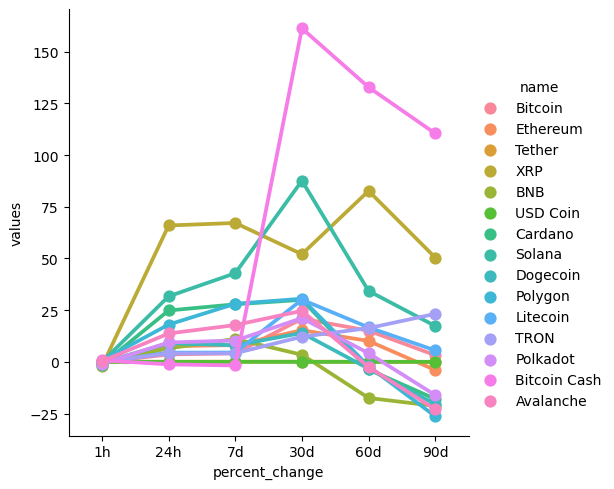

In [58]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [61]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,31399.80065,2023-07-14 05:31:09.937244
0,Bitcoin,31380.83958,2023-07-14 05:31:09.937244
0,Bitcoin,31380.95050,2023-07-14 05:31:09.937244
0,Bitcoin,31380.82224,2023-07-14 05:31:09.937244
0,Bitcoin,31384.87950,2023-07-14 05:31:09.937244
0,Bitcoin,31392.60893,2023-07-14 05:31:09.937244
0,Bitcoin,31388.90661,2023-07-14 05:31:09.937244
0,Bitcoin,31386.47843,2023-07-14 05:31:09.937244
0,Bitcoin,31385.90651,2023-07-14 05:31:09.937244
0,Bitcoin,31385.32357,2023-07-14 05:31:09.937244


C:\Users\ohid1\anaconda3\lib\site-packages\seaborn\_oldcore.py:1134: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_data.insert(0, var, comp_col)


ValueError: cannot reindex on an axis with duplicate labels

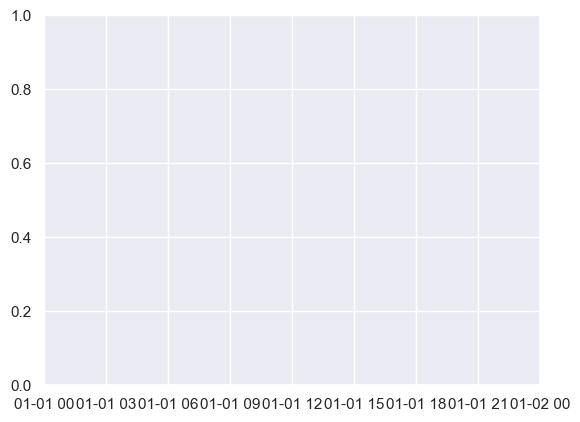

In [66]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price',data = df10)